In [1]:
using Distributions
using StatsPlots
using Turing

## Data Generation

In [ ]:
# Synthesis data following linear regression with Gaussian noise
data_size = 20

y = zeros(data_size)
x = zeros(data_size)
a0 = -0.3
a1 = 0.5

for i in 1:data_size
    x[i] = rand(Uniform(-1, 1))
    y[i] = x[i] * a1 + a0 + rand(Normal(0, 0.2))
end


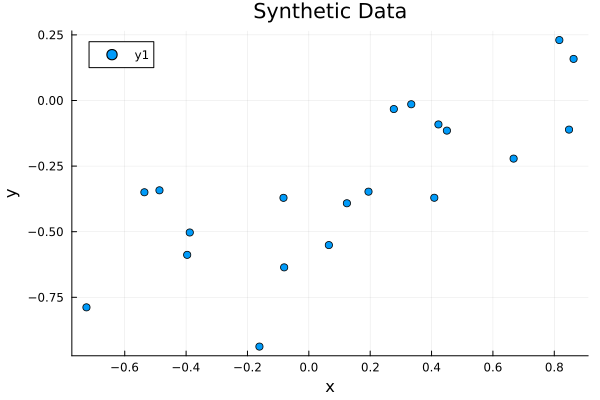

In [7]:
scatter(x, y; xlabel = 'x', ylabel = 'y', title = "Synthetic Data")

In [8]:
savefig("data.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/data.png"

## Initialization

In [ ]:
# Grid approximation
grid_size = 50

w0_grid = range(-1, 1, length = grid_size)
w0_grid = collect(w0_grid)

w1_grid = range(-1, 1, length = grid_size)
w1_grid = collect(w1_grid)

# Innitialize priors, likelihood and posteriors
prior = zeros(grid_size, grid_size)
likelihood = zeros(grid_size, grid_size)
posterior_unstandardized = zeros(grid_size, grid_size)
posterior = zeros(grid_size, grid_size)


50×50 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     

## Define Priors

In [ ]:
# Define priors (gaussians with mean 0 and sigma of 0.25 for both w_0 and w_1).
# Note that the i, j are not flipped here as we can directly use tranpose function for visualization later.
sigma = 0.25
for i in 1:grid_size
    for j in 1:grid_size
        # the coefficients are multiplied together for two gaussians
        prior[i, j] = 1 / (sigma^2 * 2 * pi) * exp(-(w0_grid[i]^2) /(2 * sigma^2)) * exp(-(w1_grid[j]^2) /(2 * sigma^2))
    end
end



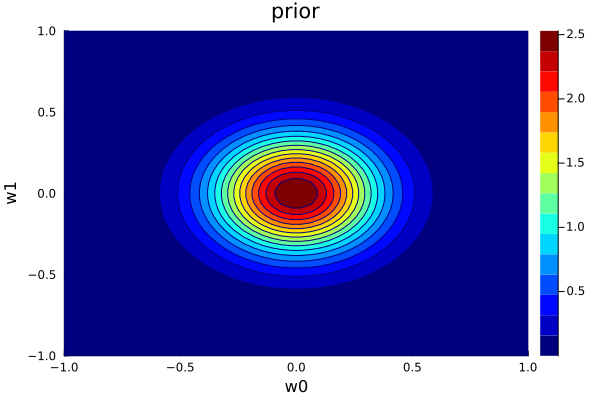

In [13]:
# Visualize prior. Note transopose() is used here for correct visualization, avoid the flip of i and j
contourf(w0_grid, w1_grid, transpose(prior), xlabel="w0", ylabel="w1", title="prior", color=:jet)


In [ ]:
savefig("prior.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/prior.png"

## Bayesian linear regression

### One data point

In [ ]:
# One data point
evidence = 0.0 # for normlaization
y_sigma = 0.2
for i in 1:grid_size
    for j in 1:grid_size
        w0 = w0_grid[i]
        w1 = w1_grid[j]
        residual = y[1] - (w1 * x[1] + w0)
        likelihood[i, j] = 1/(y_sigma * sqrt(2 * pi)) * exp(-residual^2 / (2 * y_sigma^2))
        posterior_unstandardized[i, j] = likelihood[i, j] * prior[i, j]
        evidence = evidence + posterior_unstandardized[i, j]
    end
end
# Posterior Normalization
posterior = posterior_unstandardized / evidence



50×50 Matrix{Float64}:
 9.35346e-10  1.62106e-9   2.70873e-9   …  3.47777e-16  1.04401e-16
 2.06767e-9   3.65692e-9   6.2357e-9       2.03457e-15  6.2328e-16
 4.26901e-9   7.70488e-9   1.34073e-8      1.11168e-14  3.47533e-15
 8.23204e-9   1.51618e-8   2.69236e-8      5.67311e-14  1.80985e-14
 1.4826e-8    2.78659e-8   5.04964e-8      2.70395e-13  8.80293e-14
 2.49388e-8   4.78333e-8   8.84551e-8   …  1.20368e-12  3.99895e-13
 3.91799e-8   7.66873e-8   1.44717e-7      5.00451e-12  1.69668e-12
 5.74892e-8   1.14829e-7   2.21134e-7      1.94333e-11  6.72343e-12
 7.87852e-8   1.60589e-7   3.15591e-7      7.04801e-11  2.48838e-11
 1.00841e-7   2.09756e-7   4.20658e-7      2.38739e-10  8.60157e-11
 ⋮                                      ⋱               
 5.90242e-20  2.34899e-19  9.01301e-19     4.68264e-9   3.22791e-9
 7.93046e-21  3.22073e-20  1.2611e-19      1.66503e-9   1.17127e-9
 9.9518e-22   4.12443e-21  1.64802e-20     5.5295e-10   3.96942e-10
 1.16638e-22  4.93297e-22  2.01147e-21 

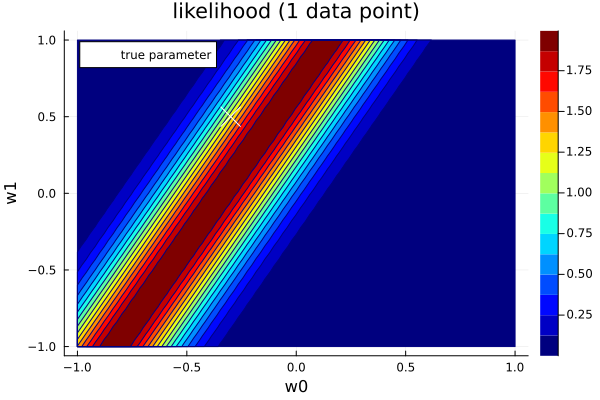

In [ ]:
# Visualize likelihood. Note transopose() is used here for correct visualization, avoid the flip of i and j.
contourf(w0_grid, w1_grid, transpose(likelihood), color=:jet, xlabel="w0", ylabel="w1", title="likelihood (1 data point)")

# Overlay the scatter point with a white cross symbol
scatter!([a0], [a1], markercolor=:white, marker=:x, markersize=10, label="true parameter")

# Display the plot
display(plot!())


In [16]:
savefig("likelihood_onedata.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/likelihood_onedata.png"

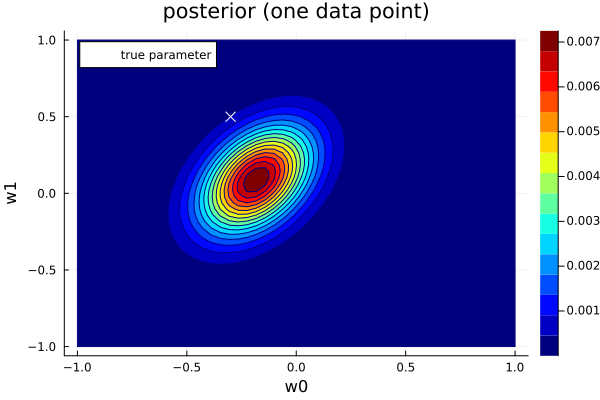

In [17]:
# Visualize posterior. Note transopose() is used here for correct visualization, avoid the flip of i and j
contourf(w0_grid, w1_grid, transpose(posterior), color=:jet, xlabel="w0", ylabel="w1", title="posterior (one data point)")

# Overlay the scatter point with a white cross symbol
scatter!([a0], [a1], markercolor=:white, marker=:x, markersize=5, label="true parameter")

# Display the plot
display(plot!())

In [18]:
savefig("posterior_onedata.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/posterior_onedata.png"

### Two data points

In [ ]:
# Two data points
prior = posterior # make prior as posterior of observing 1 data point
evidence = 0.0
y_sigma = 0.2
for i in 1:grid_size
    for j in 1:grid_size
        w0 = w0_grid[i]
        w1 = w1_grid[j]
        residual = y[2] - (w1 * x[2] + w0)
        likelihood[i, j] = 1/(y_sigma * sqrt(2 * pi)) * exp(-residual^2 / (2 * y_sigma^2))
        posterior_unstandardized[i, j] = likelihood[i, j] * prior[i, j]
        evidence = evidence + posterior_unstandardized[i, j]
    end
end
# Posterior normalization
posterior = posterior_unstandardized / evidence

50×50 Matrix{Float64}:
 3.70243e-11  6.12707e-11  9.77309e-11  …  1.08802e-18  3.07652e-19
 1.39991e-10  2.37227e-10  3.87474e-10     1.28418e-17  3.71831e-18
 4.74197e-10  8.22855e-10  1.37626e-9      1.35787e-16  4.02604e-17
 1.43902e-9   2.557e-9     4.37933e-9      1.28629e-15  3.90534e-16
 3.9122e-9    7.11843e-9   1.24842e-8      1.09161e-14  3.39381e-15
 9.52846e-9   1.77536e-8   3.18832e-8   …  8.29937e-14  2.64218e-14
 2.07909e-8   3.96675e-8   7.29475e-8      5.65287e-13  1.84283e-13
 4.06415e-8   7.9402e-8    1.49523e-7      3.44937e-12  1.15148e-12
 7.11728e-8   1.42389e-7   2.74568e-7      1.88564e-11  6.44578e-12
 1.11662e-7   2.28753e-7   4.51691e-7      9.23475e-11  3.23252e-11
 ⋮                                      ⋱               
 1.24033e-26  5.42725e-26  2.28895e-25     6.77685e-14  5.06672e-14
 5.16769e-28  2.31547e-27  9.9999e-27      8.81377e-15  6.74777e-15
 1.92887e-29  8.85005e-29  3.91383e-28     1.02694e-15  8.05084e-16
 6.44998e-31  3.0304e-30   1.37232e-

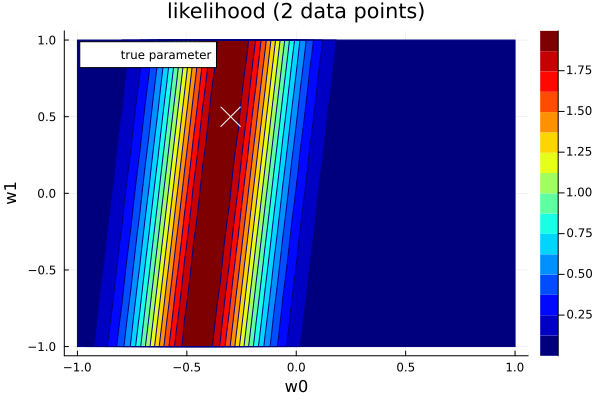

In [20]:
# Visualize likelihood. Note transopose() is used here for correct visualization, avoid the flip of i and j
contourf(w0_grid, w1_grid, transpose(likelihood), color=:jet, xlabel="w0", ylabel="w1", title="likelihood (2 data points)")

# Overlay the scatter point with a white cross symbol
scatter!([a0], [a1], markercolor=:white, marker=:x, markersize=10, label="true parameter")

# Display the plot
display(plot!())

In [21]:
savefig("likelihood_2data.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/likelihood_2data.png"

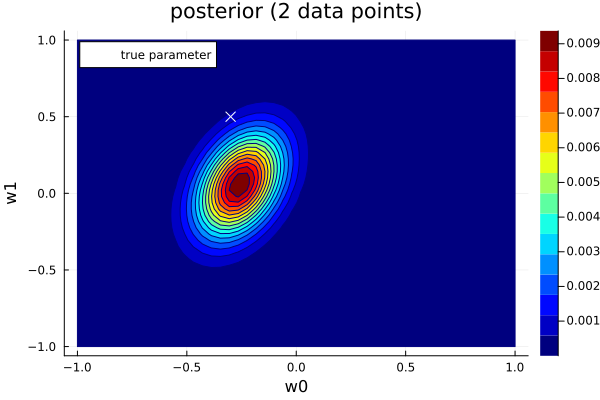

In [22]:
# Visualize posterior. Note transopose() is used here for correct visualization, avoid the flip of i and j
contourf(w0_grid, w1_grid, transpose(posterior), color=:jet, xlabel="w0", ylabel="w1", title="posterior (2 data points)")

# Overlay the scatter point with a white cross symbol
scatter!([a0], [a1], markercolor=:white, marker=:x, markersize=5, label="true parameter")

# Display the plot
display(plot!())

In [23]:
savefig("posteriro_2data.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/posteriro_2data.png"

### 20 data points

In [ ]:
# 20 data points
for k in 3:data_size
    prior = posterior
    evidence = 0.0
    y_sigma = 0.2
    for i in 1:grid_size
        for j in 1:grid_size
            w0 = w0_grid[i]
            w1 = w1_grid[j]
            residual = y[k] - (w1 * x[k] + w0)
            likelihood[i, j] = 1/(y_sigma * sqrt(2 * pi)) * exp(-residual^2 / (2 * y_sigma^2))
            posterior_unstandardized[i, j] = likelihood[i, j] * prior[i, j]
            evidence = evidence + posterior_unstandardized[i, j]
        end
    end
    # Posterior normalization
    posterior = posterior_unstandardized / evidence
end



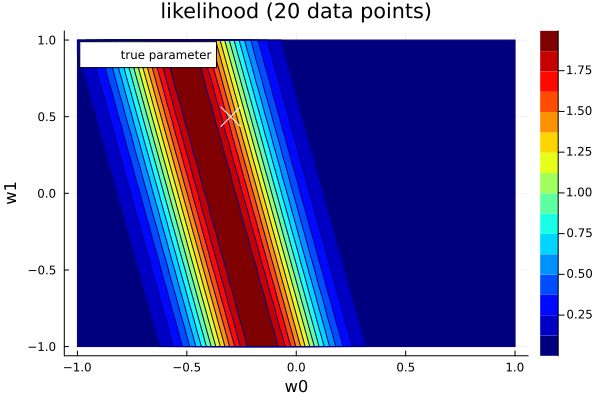

In [25]:
# Visualize likelihood. Note transopose() is used here for correct visualization, avoid the flip of i and j.
contourf(w0_grid, w1_grid, transpose(likelihood), color=:jet, xlabel="w0", ylabel="w1", title="likelihood (20 data points)")

# Overlay the scatter point with a white cross symbol
scatter!([a0], [a1], markercolor=:white, marker=:x, markersize=10, label="true parameter")

# Display the plot
display(plot!())

In [26]:
savefig("likelihood_20data.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/likelihood_20data.png"

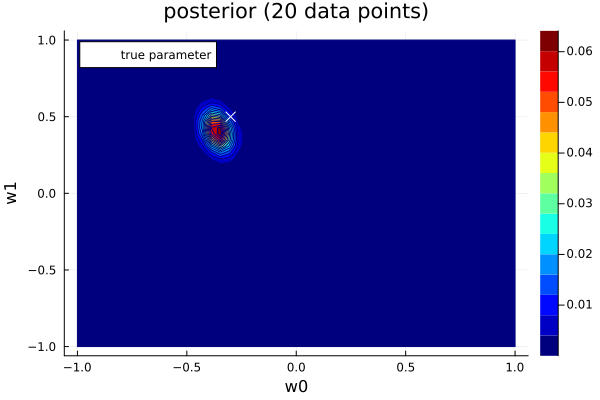

In [27]:
# Visualize posterior. Note transopose() is used here for correct visualization, avoid the flip of i and j
contourf(w0_grid, w1_grid, transpose(posterior), color=:jet, xlabel="w0", ylabel="w1", title="posterior (20 data points)")

# Overlay the scatter point with a white cross symbol
scatter!([a0], [a1], markercolor=:white, marker=:x, markersize=5, label="true parameter")

# Display the plot
display(plot!())

In [28]:
savefig("posterior_20data.png")

"/Users/xinwenliu/Documents/Classes/ucla/Bayesian_statistics/codes/STJuliaIntroBayesian-main/posterior_20data.png"

In [ ]:
# Compute max_prob and MAPs
max_prob, max_index = findmax(posterior)
w0_max = w0_grid[max_index[1]]
w1_max = w1_grid[max_index[2]]

# Output the results, w0 are w1 are -0.3469 and 0.3878 here
println("Maximum probability: ", max_prob)
println("Corresponding w0: ", w0_max)
println("Corresponding w1: ", w1_max)